# Final Project: traffic indidents in San Francisco

## Part 4: Motorcyclist Deaths

#### in this section, I will take a look at motorcyclist deaths, and look for patterns and interesting facts. Because there were not enough e-scooter data to form convincing statements

#### Filtering Data

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("../data/cleaned_fatality_data.csv")

df_motorcyclist = df[df["deceased"] == "Motorcyclist"]


df_motorcyclist

,unique_id,case_id_fkey,latitude,longitude,collision_year,death_date,death_time,death_datetime,collision_date,collision_time,...,supervisor_district,police_district,data_as_of,data_loaded_at,year,month,day,hour,month_name,time_of_day
3,16,150562049,37.777300,-122.419694,2015,2015-06-30,06:00:00,2015-06-30 06:00:00,2015-06-28,03:52:00,...,5.0,NORTHERN,2024-09-18,2025-11-06 10:51:39,2015,6,28,3,June,Night (00–05)
9,20240932,240417841,37.765183,-122.417487,2024,2024-07-10,16:55:00,2024-07-10 16:55:00,2024-07-05,01:14:00,...,9.0,MISSION,2024-09-18,2025-11-06 10:51:39,2024,7,5,1,July,Night (00–05)
20,20240346,240152047,37.768777,-122.468334,2024,2024-03-08,03:41:00,2024-03-08 03:41:00,2024-03-08,15:20:00,...,7.0,RICHMOND,2024-09-18,2025-11-06 10:51:39,2024,3,8,15,March,Afternoon (12–17)
24,20250394,250144448,37.751472,-122.417802,2025,2025-03-13,13:47:00,2025-03-13 13:47:00,2025-03-13,13:37:00,...,9.0,MISSION,2025-04-18,2025-11-06 10:51:39,2025,3,13,13,March,Afternoon (12–17)
31,20241477,240740642,37.723130,-122.435977,2024,2024-11-29,18:22:00,2024-11-29 18:22:00,2024-11-29,13:47:00,...,11.0,INGLESIDE,2025-01-10,2025-11-06 10:51:39,2024,11,29,13,November,Afternoon (12–17)
42,20250201,250074798,37.793223,-122.414470,2025,2025-02-07,17:01:00,2025-02-07 17:01:00,2025-02-07,16:27:00,...,3.0,CENTRAL,2025-02-18,2025-11-06 10:51:39,2025,2,7,16,February,Afternoon (12–17)
46,20251053,250440478,37.780431,-122.389028,2025,2025-08-09,04:44:00,2025-08-09 04:44:00,2025-08-09,04:28:00,...,6.0,SOUTHERN,2025-09-16,2025-11-06 10:51:39,2025,8,9,4,August,Night (00–05)
49,104,160413852,37.765448,-122.413105,2016,2016-05-20,23:07:00,2016-05-20 23:07:00,2016-05-22,NaN,...,9.0,MISSION,2024-09-18,2025-11-06 10:51:39,2016,5,22,0,May,Night (00–05)
51,329,210711253,37.765448,-122.413105,2021,2021-10-30,00:18:00,2021-10-30 00:18:00,2021-10-29,23:16:00,...,9.0,MISSION,2024-09-18,2025-11-06 10:51:39,2021,10,29,23,October,Evening (18–23)
52,328,210647028,37.800386,-122.447131,2021,2021-10-05,00:57:00,2021-10-05 00:57:00,2021-10-05,00:45:00,...,2.0,NORTHERN,2024-09-18,2025-11-06 10:51:39,2021,10,5,0,October,Night (00–05)


#### We will construct a bar chart to see has the traffic safety increased over the year in the city of San Francisco

In [60]:
motorcyclist_deaths_by_year = df_motorcyclist.groupby("year").size().sort_index()
motorcyclist_deaths_by_year

year
2014    4
2015    6
2016    1
2017    4
2018    2
2019    1
2020    7
2021    8
2022    6
2023    1
2024    4
2025    3
dtype: int64

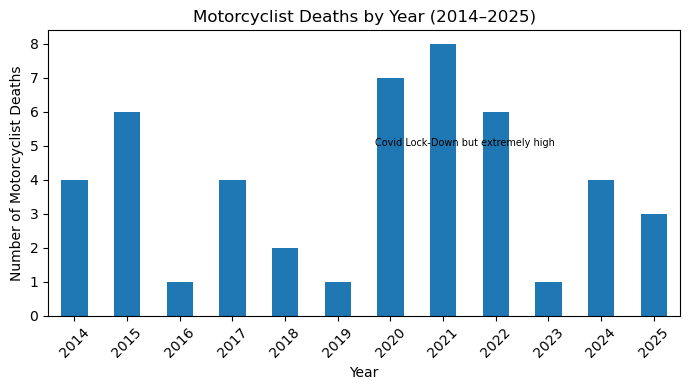

In [72]:
plt.figure(figsize=(7,4))
motorcyclist_deaths_by_year.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Motorcyclist Deaths")
plt.title("Motorcyclist Deaths by Year (2014–2025)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.text(
    5.7, 5,                     
    "Covid Lock-Down but extremely high",     # text
    fontsize=7
)

plt.savefig("../figures/motorcyclist_death_over_years.png", dpi=300)
plt.show()


#### We will construct a line chart to see which months has the least motorcyclist deaths

In [62]:
motorcyclist_deaths_by_month = df_motorcyclist.groupby("month").size().sort_index()
motorcyclist_deaths_by_month

month
1     3
2     3
3     6
5     3
6     4
7     3
8     8
9     3
10    7
11    3
12    4
dtype: int64

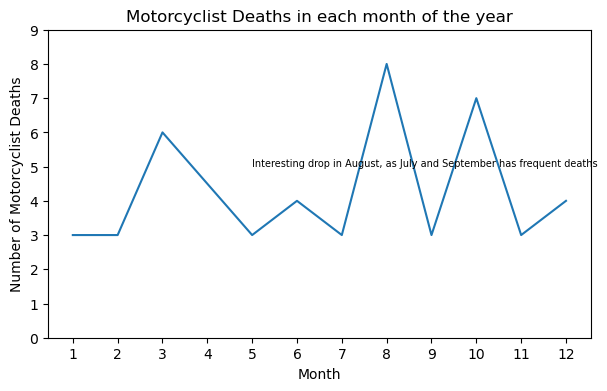

In [69]:
plt.figure(figsize=(7,4))
motorcyclist_deaths_by_month.plot(kind = "line")
plt.xlabel("Month")
plt.ylabel("Number of Motorcyclist Deaths")
plt.title("Motorcyclist Deaths in each month of the year")
plt.xticks(range(1, 13)) 
plt.yticks(range(0,10)) 
plt.text(
    5, 5,                     
    "Interesting drop in August, as July and September has frequent deaths",     # text
    fontsize=7
)

plt.savefig("../figures/motorcyclist_death_over_months.png",dpi=300)
plt.show()

#### We will construct a pie chart to see which type of incidents has the least motorcyclist deaths

In [64]:
death_by_collission_type = df_motorcyclist.groupby("collision_type").size().sort_index()
death_sorted = death_by_collission_type.sort_values(ascending=False)

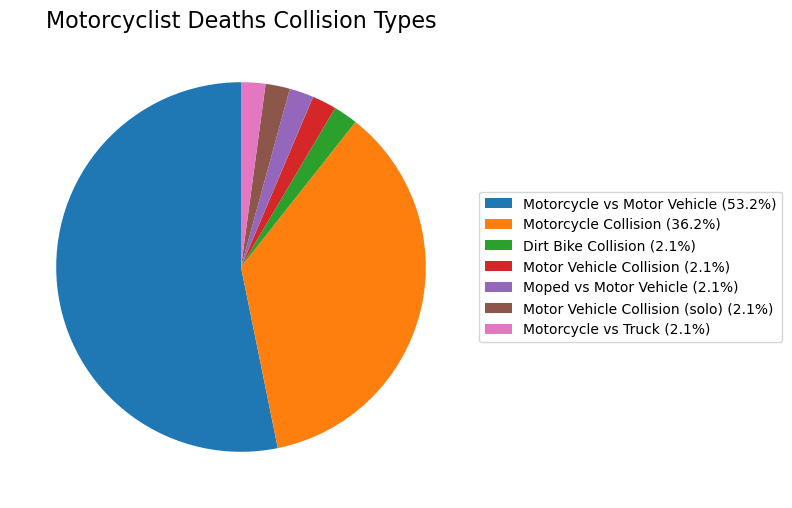

In [70]:

plt.figure(figsize=(6,6))

plt.pie(
    death_sorted,
    startangle=90
)

labels = [f"{k} ({v / death_sorted.sum():.1%})" for k, v in death_sorted.items()]


plt.legend(
    labels,
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Motorcyclist Deaths Collision Types",fontsize=16)
plt.savefig("../figures/motorcyclist_death_collision_types.png",dpi=300)
plt.show()
